## Завдання лабораторної роботи №1

### Виконання основних афінних перетворень на об'єкті з 8 вершин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initialising object with 8 vertices

In [2]:
vertices = np.array([
    [0.5, 1.5, 1],
    [1, 1, 1],
    [2, 1, 1],
    [2.5, 1.5, 1],
    [2.5, 2, 1],
    [2, 2.5, 1],
    [1, 2.5, 1],
    [0.5, 2, 1]
])


View the Object 

(8, 3)


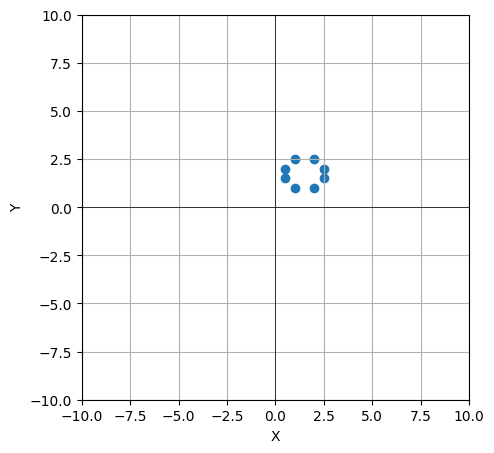

In [3]:
GRAPH = None
def plot_object(vertices):
    global GRAPH
    print(vertices.shape)
    if(vertices.shape[0]==3):
        vertices = vertices.T
    plt.figure(figsize=(5, 5))
    plt.xlim(-10.0, 10.0)
    plt.ylim(-10.0, 10.0)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    GRAPH = plt.scatter(vertices[:, 0], vertices[:, 1])


    plt.show()
    
plot_object(vertices)

Зменшення об'єкта в 1.5 разів (Завдання 2)

(8, 3)


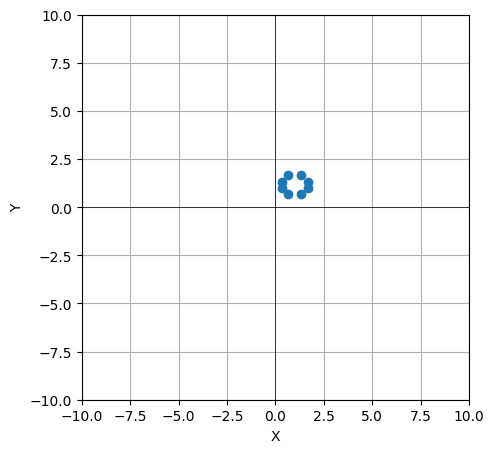

In [4]:
scaled_vertices=vertices/1.5
plot_object(scaled_vertices)

Симетичне відображення об'єкта відносно початку координат -> $(x,y) = (-x,-y)$

(8, 3)


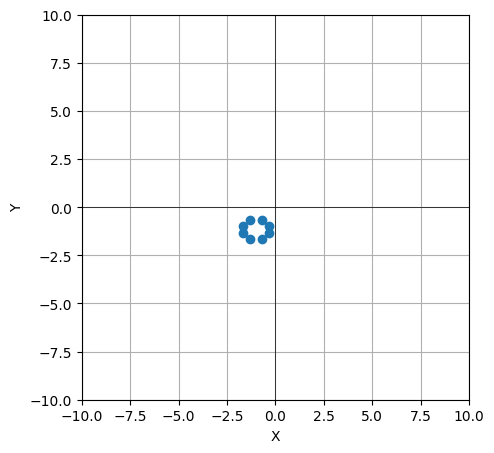

In [5]:
M_reflection = np.array([
    [-1, 0, 0],
    [0, -1, 0],
    [0,  0, 1]
])

reflected = M_reflection.dot(scaled_vertices.T).T
plot_object(reflected)

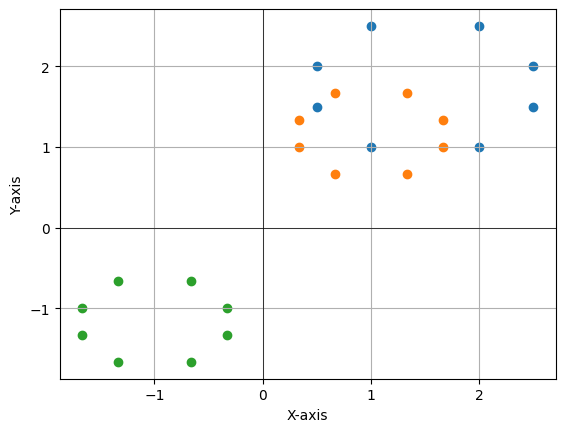

In [15]:
plt.scatter(vertices[:, 0], vertices[:, 1])
plt.scatter(scaled_vertices[:, 0], scaled_vertices[:, 1])
plt.scatter(reflected[:, 0], reflected[:, 1])


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.show()

Відображення об'єкта відносно лінії заданої двома точками

Пряма:\
From given $(x_1, y_1)$ and $(x_2, y_2)$ as a points we can than define a line.\
It can be done by:\
$\vec{v}=(\Delta{x}, \Delta{y})=(x_2-x_1, y_2-y_1)$\
Angle parameter:\
$k=tg(\alpha)=\vec{v}_y/\vec{v}_x$\
$b$ parameter from line $y=kx+b$\
$b=y-kx=y_1-kx_1$

1.0
-4.0 1.0


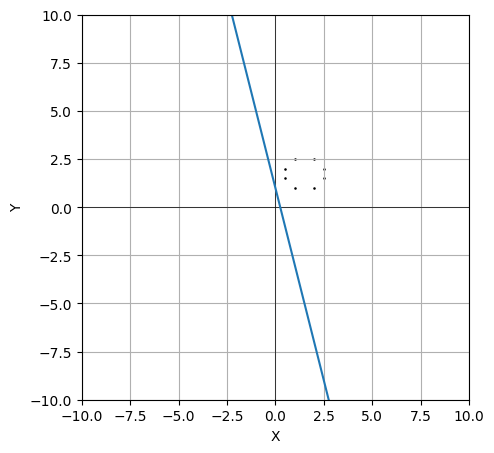

In [12]:
line_points = np.array([[-1, 5, 1], 
                        [0, 1, 1]])


def get_line(line_points):
    vector=line_points[1]-line_points[0]
    k=float(vector[1])/vector[0]
    b=line_points[0][1]-k*line_points[0][0]
    print(b)
    x = np.linspace(-200, 200, 200)
    y = k*x+b
    print(k, b)
    return x, y, k, b

line_x, line_y, k, b = get_line(line_points)
line = np.stack((line_x, line_y, np.ones(len(line_x)))).T

def plot_object_with_line(vertices, line, size=(200, 200)):
    size_x, size_y = size[0], size[1] 
    # init_vertices = vertices.copy()
    if(vertices.shape[0]==3):
        vertices = vertices.T
    plt.figure(figsize=(5, 5))
    plt.xlim(-size_x, size_x)
    plt.ylim(-size_y, size_y)
    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    plt.scatter(vertices[:, 0], vertices[:, 1], s=0.7, c='black')
    plt.plot(line[:, 0], line[:, 1])
    
plot_object_with_line(vertices, line, (10, 10))



Визначення матриць афінних перетворень для відображення об'єкта відносно заданої лінії

-1.3258176636680326
4.4674103172578254


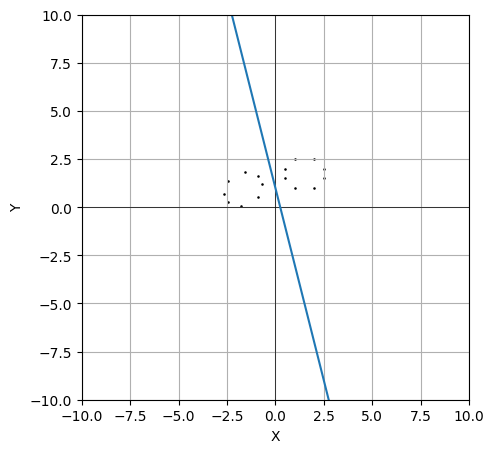

In [13]:
import math as m

alpha = m.atan(k) #k=tg(α)
print(alpha)
pi = m.pi
alpha=pi-alpha

print(alpha)
M_rotate_by_angle = np.array([
    [m.cos(alpha), m.sin(alpha), 0],
    [-m.sin(alpha), m.cos(alpha),  0],
    [0,             0,            1]
])

M_translate = np.array([
    [1, 0, 0],
    [0, 1, -b],
    [0, 0, 1]])

M_reflect_y = np.array([
    [1,  0, 0],
    [0, -1, 0],
    [0,  0, 1]
])

M_translate_back = np.array([
    [1, 0,  0],
    [0, 1,  b],
    [0, 0,  1]])


M_rotate_back_by_angle = np.array([
    [m.cos(-alpha), m.sin(-alpha),  0],
    [-m.sin(-alpha), m.cos(-alpha), 0],
    [0,             0,              1]
])


# M_reflex_by_line = ((M_rotate_by_angle.dot(M_reflect_y)).dot(M_rotate_back_by_angle))
M_reflex_by_line = (M_translate.T).dot(M_rotate_by_angle).dot(M_reflect_y).dot(M_rotate_back_by_angle).dot(M_translate_back.T)
operation_rotate_by_line = vertices.dot(M_reflex_by_line)
tree = np.vstack((operation_rotate_by_line, vertices))
plot_object_with_line(tree, line, (10, 10))

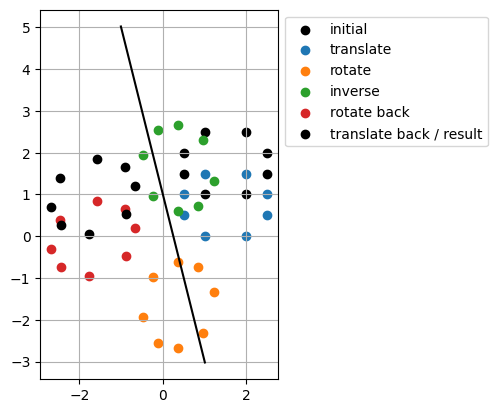

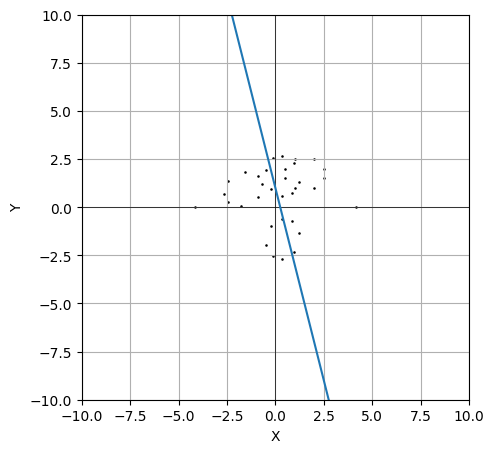

In [14]:
### one by one
# M_reflex_by_line = M_translate.dot(M_rotate_by_angle).dot(M_reflect_y).dot(M_rotate_back_by_angle).dot(M_translate_back)
res1 = vertices.dot(M_translate.T)
line1 = line.dot(M_translate.T)
res2 = res1.dot(M_rotate_by_angle)
line2 = line1.dot(M_rotate_by_angle)
res3 = res2.dot(M_reflect_y)
res4 = res3.dot(M_rotate_back_by_angle)
res5 = res4.dot(M_translate_back.T)


plt.scatter(vertices[:, 0], vertices[:, 1], label='initial', c='black')
plt.scatter(res1[:, 0], res1[:, 1], label='translate')
plt.scatter(res2[:, 0], res2[:, 1], label='rotate')
plt.scatter(res3[:, 0], res3[:, 1], label='inverse')
plt.scatter(res4[:, 0], res4[:, 1], label='rotate back')
plt.scatter(res5[:, 0], res5[:, 1], label='translate back / result', c='black')

plt.plot(line[line.shape[0]//2-1:line.shape[0]//2+1, 0], line[line.shape[0]//2-1:line.shape[0]//2+1, 1], c='black')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

tree = np.vstack((line2, vertices, res2, res3, res5))
plot_object_with_line(tree, line, (10, 10))

### Виконання процедур на об'єкті №7

[[109.116  87.49    1.   ]
 [108.008  88.598   1.   ]
 [108.008  89.164   1.   ]]


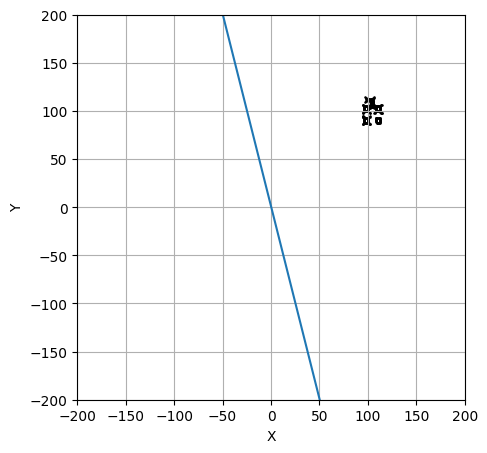

In [10]:
import pandas as pd

pandas_df = pd.read_csv('figure_7.csv')
data = pandas_df.to_numpy()

data = np.c_[data, np.ones(data.shape[0])]
print(data[:3, :])

plot_object_with_line(data, line)

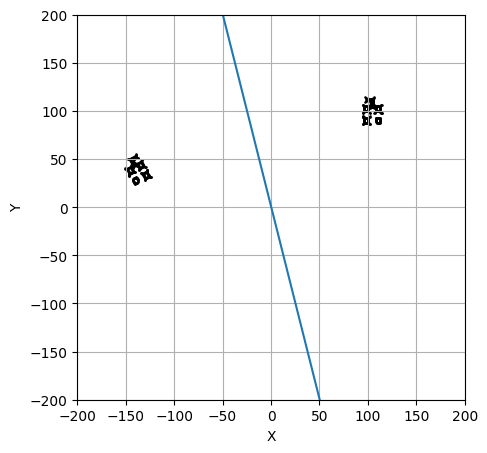

In [11]:
operation_rotate_by_line = M_reflex_by_line.dot(data.T)

tree = np.vstack((data, operation_rotate_by_line.T))
plot_object_with_line(tree, line)